list for the ratio of M and m for different values of D is: [2.9820262995913347, 2.857276608775464, 2.1255317099479853, 2.1814739304738993, 2.0278580478680417, 2.037783470369056, 1.9792576877731074, 1.9568372773323919, 1.9840620771041302, 1.882428982995145, 2.0210011854366097]
list for the ratio of M and m for different values of D is: [2.6456627417613228, 2.5653282365335532, 2.546837180969266, 2.081280762281944, 2.13748558442696, 2.191644275477015, 1.9531291183245703, 1.964197125690335, 2.043229333313568, 2.0140619404683013, 2.034401002094082]
list for the ratio of M and m for different values of D is: [3.0603615506339032, 2.308199319926305, 1.9952791353250074, 2.0460954842405, 1.9845299099237539, 1.7783069811224061, 1.968375827853176, 1.9118159280002385, 1.95870512614025, 1.9349237558339691, 2.034422333611058]
list for the ratio of M and m for different values of D is: [2.828863878946015, 2.7470358250102755, 2.1685260553414496, 2.2431963302311937, 1.974515711695615, 2.012272643247921

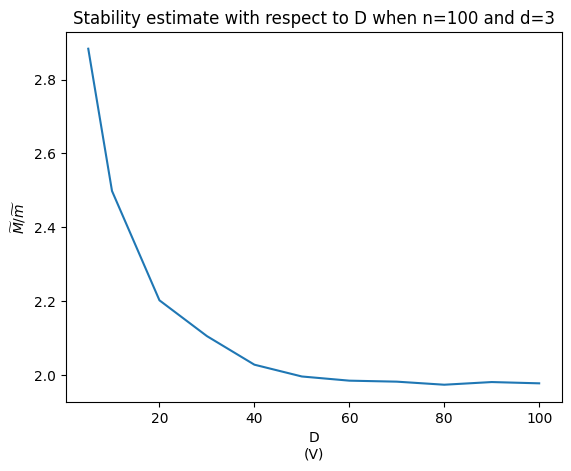

In [ ]:
import numpy as np
import scipy
from scipy import optimize
from numpy import *
from numpy import trace
from numpy import linalg as LA
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
ratio_seed=[]
np.random.seed(0)
for Seed in [1,2,3,4,5,6,7,8,9,10]:
  ratio = []
  def check(D):
      # n=10  #n=3,10
      # d=20   #d=10,20
      exp_num = 1000
      calculate = []

      def repeat(A):
          # print('A first coordinate',A[0,0])

          def find(Xi, A):
              Z = np.dot(A, Xi)
              Yi = np.sort(Z, axis=1)
              return (Yi)

          X1 = np.random.normal(size=(d, n))
          Y1 = find(X1, A)
          # print('matrix X1 is:',X1,'for the matrix A Sort (AX1)=Y1 which is:',Y1)
          X2 = np.random.normal(size=(d, n))      # X2=np.random.permutation(np.transpose(X1)). # X2=np.transpose(X2)


          Y2 = find(X2, A)
          # print('matrix X2 is:',X2,'and for the matrix A Sort (AX2)=Y2 which is:',Y2)

          # print('Y1-Y2 is:',np.subtract(Y1,Y2),'Frobenious norm of Y1-Y2 is:',LA.norm(np.subtract(Y1,Y2), 'fro'))
          F = LA.norm(np.subtract(Y1, Y2), 'fro')
          # print('Frobenious norm of Y1-Y2 is:',F)     # we can also use N=LA.norm(Z), both are same

          def dist(X1, X2):
              # print('X1 is:', X1)

              # print('X2 is:', X2)

              X3 = np.transpose(X1)
              # print('transpose of X1 is:',X3)
              M1 = np.dot(X3, X2)  # this part is for denominator
              # print('X3*X2 is:',M)
              Mt = np.transpose(M1)
              # print('transpose of M is:',Mt)

              I, F = scipy.optimize.linear_sum_assignment(Mt, maximize=True)
              # print('Required permutation matrics (with row and column indices) is :',I,F)
              permutation_matrix = csr_matrix(
                  (np.ones(n, dtype=int), (F, I)), shape=(n, n))
              P = permutation_matrix.todense()
              # print(P)
              # A=np.dot(X1,P)
              # print('A is:',A)
              X1_s = LA.norm(X1)
              R = X1_s*X1_s
              X2_s = LA.norm(X2)
              S = X2_s*X2_s
              T1 = np.dot(P, Mt)
              T = matrix.trace(T1)
              # print(T)
              D2 = R+S-2*T
              D2 = np.abs(D2)
              L = sqrt(D2)
              # print(D)
              # print('d(X1,X2), distance between X1 and X2 is:',D)
              return L
          L = dist(X1, X2)

          def lipschitz(F, L):

              Mi = float(F/L)       # print('Lipschitz constant =',Mi)
              calculate.append(Mi)
          lipschitz(F, L)
      calculate = []

      np.random.seed(Seed)
      A = np.random.normal(size=(D, d))
      for i in range(exp_num):

          repeat(A)

      # print(calculate)
      M = max(calculate)
      m = min(calculate)
      F = M/m
      # print('Maximum is M:',M)
      # print('Minimum is m:',m)
      # print(F)
      ratio.append(F)


  X = np.array([5,10, 20, 30, 40, 50, 60, 70, 80,90,100])
  #X = np.array([5,10, 15, 20, 25, 30, 35, 40, 45])
  for D in X:  # for calculating the ratio of M and m for different values of D.
      n = 100
      d = 3
      check(D)
  print('list for the ratio of M and m for different values of D is:', ratio)
  Y = ratio
  ratio_seed.append(Y)

#print('list of ratios corresponding to different seeds and D is:',ratio_seed)
average_ratio = [sum(sub_list) / len(sub_list) for sub_list in zip(*ratio_seed)]
print('list of average ratio is:',average_ratio)
print('list of the values of number of rows of A is:',X)
plt.plot(X,average_ratio)
plt.xlabel('D\n(V)')
plt.ylabel('$\widetilde{M}/\widetilde{m}$')
plt.title(f"Stability estimate with respect to D when n={n} and d={d}")
plt.show()

